In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
early_stage_diabetes_risk_prediction = fetch_ucirepo(id=529) 
  
# data (as pandas dataframes) 
X = early_stage_diabetes_risk_prediction.data.features 
y = early_stage_diabetes_risk_prediction.data.targets 
  
# metadata 
print(early_stage_diabetes_risk_prediction.metadata) 
  
# variable information 
print(early_stage_diabetes_risk_prediction.variables) 

{'uci_id': 529, 'name': 'Early Stage Diabetes Risk Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/529/data.csv', 'abstract': 'This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient. ', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 520, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Gender'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5VG8H', 'creators': [], 'intro_paper': {'ID': 397, 'type': 'NATIVE', 'title': 'Likelihood Prediction of Diabetes at Early Stage Using Data Mining Techniques', 'authors': 'M. M. F. Islam, Rahatara Ferdousi, Sadikur Rahman, Humayra Yas

## Explore the Dataset

In [2]:
# Display first few rows of data
print(X.head())
print(y.head())

# Check for data types, missing values, and basic info
print(X.info())
print(X.describe())
print(X.isnull().sum())  # Check for missing values

   age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  genital_thrush visual_blurring itching irritability delayed_healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial_paresis muscle_stiffness alopecia obesity  
0              No              Yes      Yes     Ye

## Handle Missing Values

In [10]:
# Handle missing values
# For numerical columns, fill with median
numeric_columns = X.select_dtypes(include=['number']).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())

# For categorical columns, fill with mode
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
X[categorical_columns] = X[categorical_columns].fillna(X[categorical_columns].mode().iloc[0])

# Verify missing values have been handled
print("\nMissing Values After Cleaning:\n", X.isnull().sum())


Missing Values After Cleaning:
 age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64


## Remove Outliers

In [8]:
# Calculate IQR for numerical columns
Q1 = X[numeric_columns].quantile(0.25)
Q3 = X[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
X = X[~((X[numeric_columns] < lower_bound) | (X[numeric_columns] > upper_bound)).any(axis=1)]

print("\nShape After Outlier Removal:", X.shape)




Shape After Outlier Removal: (516, 16)


## Match Data Types to Categories

In [9]:
# Convert categorical columns to 'category' dtype
for col in categorical_columns:
    X[col] = X[col].astype('category')

# Verify data types
print("\nData Types After Adjustment:\n", X.dtypes)


Data Types After Adjustment:
 age                      int64
gender                category
polyuria              category
polydipsia            category
sudden_weight_loss    category
weakness              category
polyphagia            category
genital_thrush        category
visual_blurring       category
itching               category
irritability          category
delayed_healing       category
partial_paresis       category
muscle_stiffness      category
alopecia              category
obesity               category
dtype: object


## Remove Rows with Missing Values

In [11]:
# Remove rows with missing values
X_cleaned = X.dropna()

# Verify that there are no missing values
print("Missing Values After Dropping Rows:\n", X_cleaned.isnull().sum())

# Check the shape of the dataset after removal
print("Shape After Dropping Rows:", X_cleaned.shape)

Missing Values After Dropping Rows:
 age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
dtype: int64
Shape After Dropping Rows: (516, 16)


## Descriptive Statistics

In [12]:
# Summary statistics for numerical data
print("\nNumerical Data Summary:\n", X[numeric_columns].describe())

# Value counts for categorical data
for col in categorical_columns:
    print(f"\nValue Counts for {col}:\n", X[col].value_counts())


Numerical Data Summary:
               age
count  516.000000
mean    47.722868
std     11.685970
min     16.000000
25%     39.000000
50%     47.000000
75%     56.000000
max     79.000000

Value Counts for gender:
 Male      326
Female    190
Name: gender, dtype: int64

Value Counts for polyuria:
 No     260
Yes    256
Name: polyuria, dtype: int64

Value Counts for polydipsia:
 No     287
Yes    229
Name: polydipsia, dtype: int64

Value Counts for sudden_weight_loss:
 No     303
Yes    213
Name: sudden_weight_loss, dtype: int64

Value Counts for weakness:
 Yes    303
No     213
Name: weakness, dtype: int64

Value Counts for polyphagia:
 No     281
Yes    235
Name: polyphagia, dtype: int64

Value Counts for genital_thrush:
 No     404
Yes    112
Name: genital_thrush, dtype: int64

Value Counts for visual_blurring:
 No     287
Yes    229
Name: visual_blurring, dtype: int64

Value Counts for itching:
 No     267
Yes    249
Name: itching, dtype: int64

Value Counts for irritability:
 No   

## Checking values shapes

In [14]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (516, 16)
Shape of y: (520, 1)


In [15]:
# Reset the index of both X and y to ensure proper alignment
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# Align the shapes
min_length = min(len(X), len(y))
X = X.iloc[:min_length]
y = y.iloc[:min_length]

# Confirm alignment
print("Aligned Shapes:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Aligned Shapes:
Shape of X: (516, 16)
Shape of y: (516, 1)


## Train-Test Split

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (412, 16)
Testing set shape: (104, 16)


## Train the Linear Regression Model

In [32]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables in the features (e.g., 'gender', 'polyuria', etc.)
categorical_columns = ['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 
                       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 
                       'itching', 'irritability', 'delayed_healing', 'partial_paresis', 
                       'muscle_stiffness', 'alopecia', 'obesity']

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Encode the target column 'class'
df['class'] = label_encoder.fit_transform(df['class'])

# Define features (X) and target (y)
X = df.drop(columns=['class'])  # 'class' is the target column
y = df['class']  # 'class' is the target column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.08970271297753937
R^2 Score: 0.5859050176845644


## Residual Plot

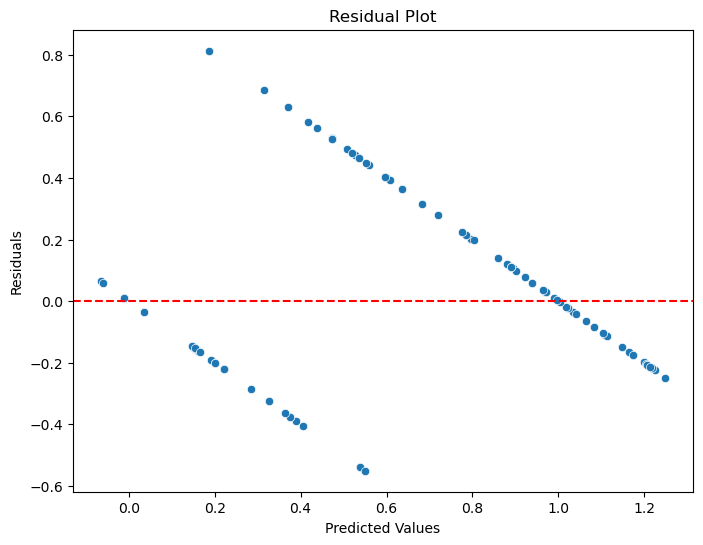

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## Prediction vs Actual Plot

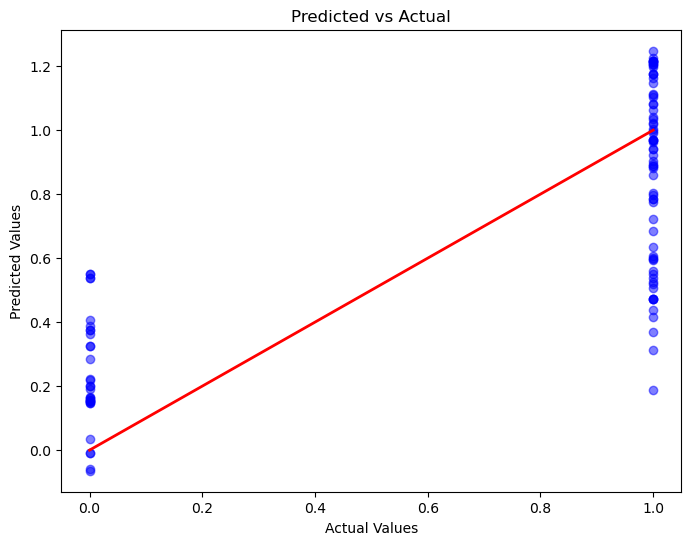

In [34]:
# Prediction vs Actual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)  # Ideal line
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## Import the necessary library

In [35]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Step 2: Load the dataset
file_path = 'C:/Users/INNOCENT/Desktop/Project dataset/Project1/Early_stage_diabetes.csv'  # Update this path
data = pd.read_csv(file_path)

In [37]:
# Step 3: Display dataset information
print("Dataset Head:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Head:
   age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  genital_thrush visual_blurring itching irritability delayed_healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial_paresis muscle_stiffness alopecia obesity     class  
0              No         

In [38]:
# Step 4: Define symptom columns
symptom_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
    'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]

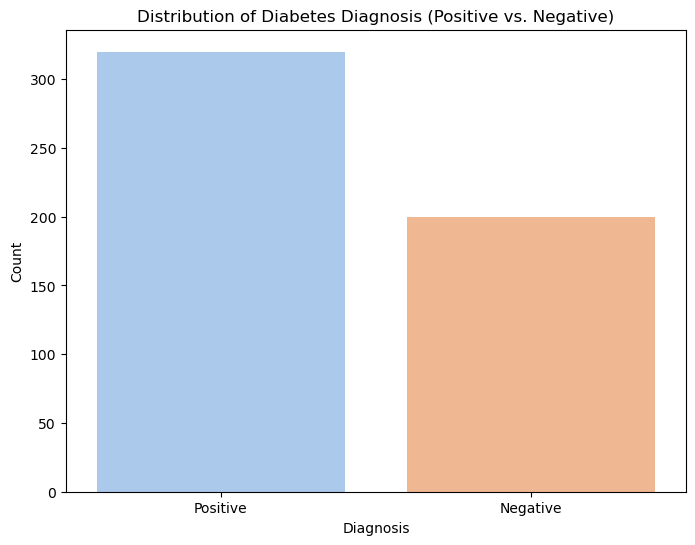

In [39]:
# Step 5: EDA Question 1 - Distribution of the target variable (`class`)
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='class', palette='pastel', order=data['class'].value_counts().index)
plt.title('Distribution of Diabetes Diagnosis (Positive vs. Negative)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('class_distribution.png')  # Save the chart
plt.show()

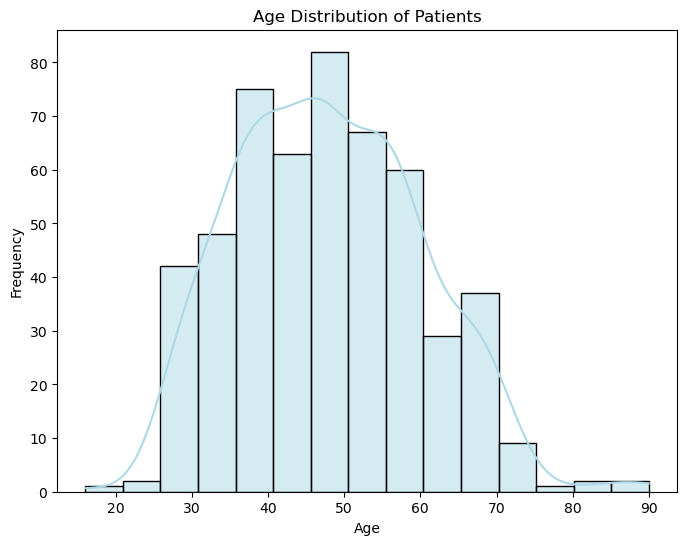

In [40]:
# Step 6: EDA Question 2 - Distribution of patients’ ages
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='age', kde=True, bins=15, color='lightblue', edgecolor='black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')  # Save the chart
plt.show()

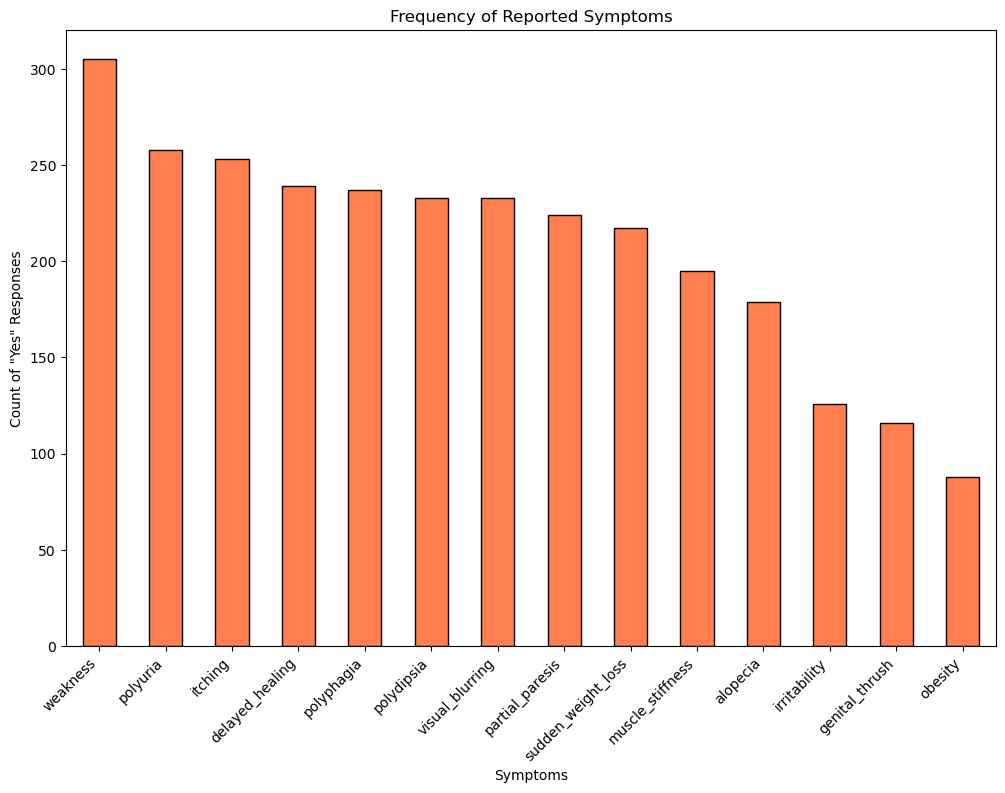

In [41]:
# Step 7: EDA Question 3 - Frequency of symptoms reported overall
symptom_counts = data[symptom_columns].apply(lambda x: (x == 'Yes').sum())

plt.figure(figsize=(12, 8))
symptom_counts.sort_values(ascending=False).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Frequency of Reported Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Count of "Yes" Responses')
plt.xticks(rotation=45, ha='right')
plt.savefig('symptom_frequency.png')  # Save the chart
plt.show()

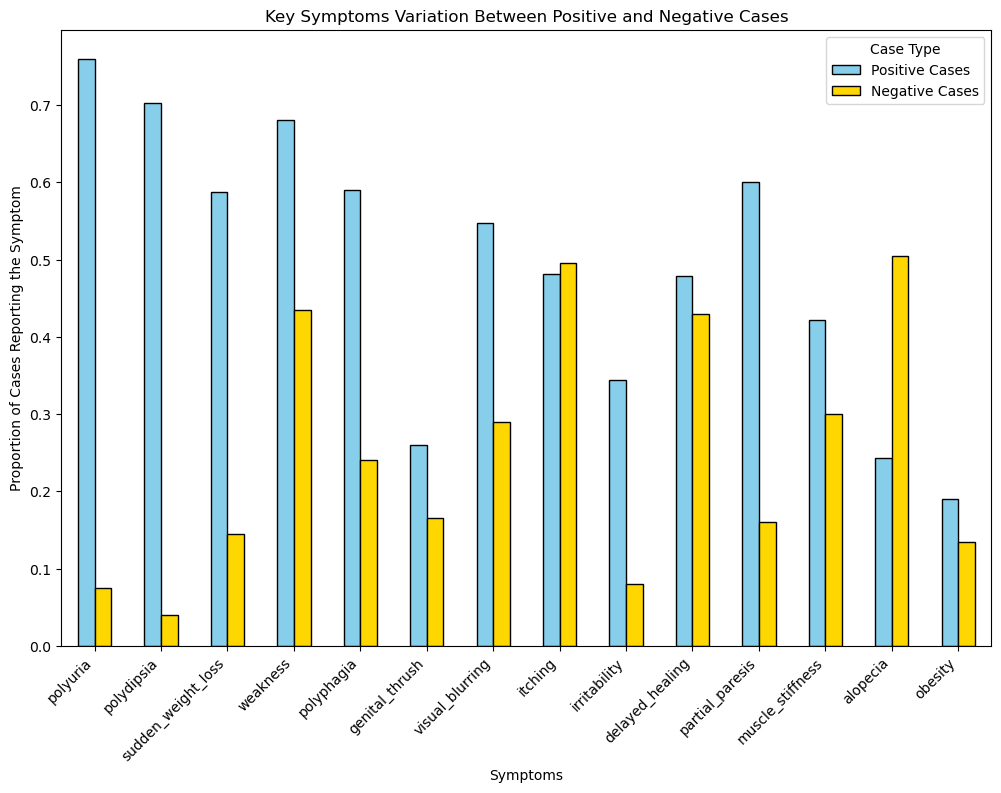

In [45]:
# Step 8: EDA Question 4 - How symptoms differ between Positive and Negative cases
symptom_positive = data[data['class'] == 'Positive'][symptom_columns].apply(lambda x: (x == 'Yes').mean())
symptom_negative = data[data['class'] == 'Negative'][symptom_columns].apply(lambda x: (x == 'Yes').mean())

# Combine into a DataFrame for comparison
symptom_comparison = pd.DataFrame({'Positive Cases': symptom_positive, 'Negative Cases': symptom_negative})

# Plot the comparison
symptom_comparison.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'gold'], edgecolor='black')
plt.title('Key Symptoms Variation Between Positive and Negative Cases')
plt.xlabel('Symptoms')
plt.ylabel('Proportion of Cases Reporting the Symptom')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Case Type')
plt.savefig('symptom_comparison.png')  # Save the chart
plt.show()

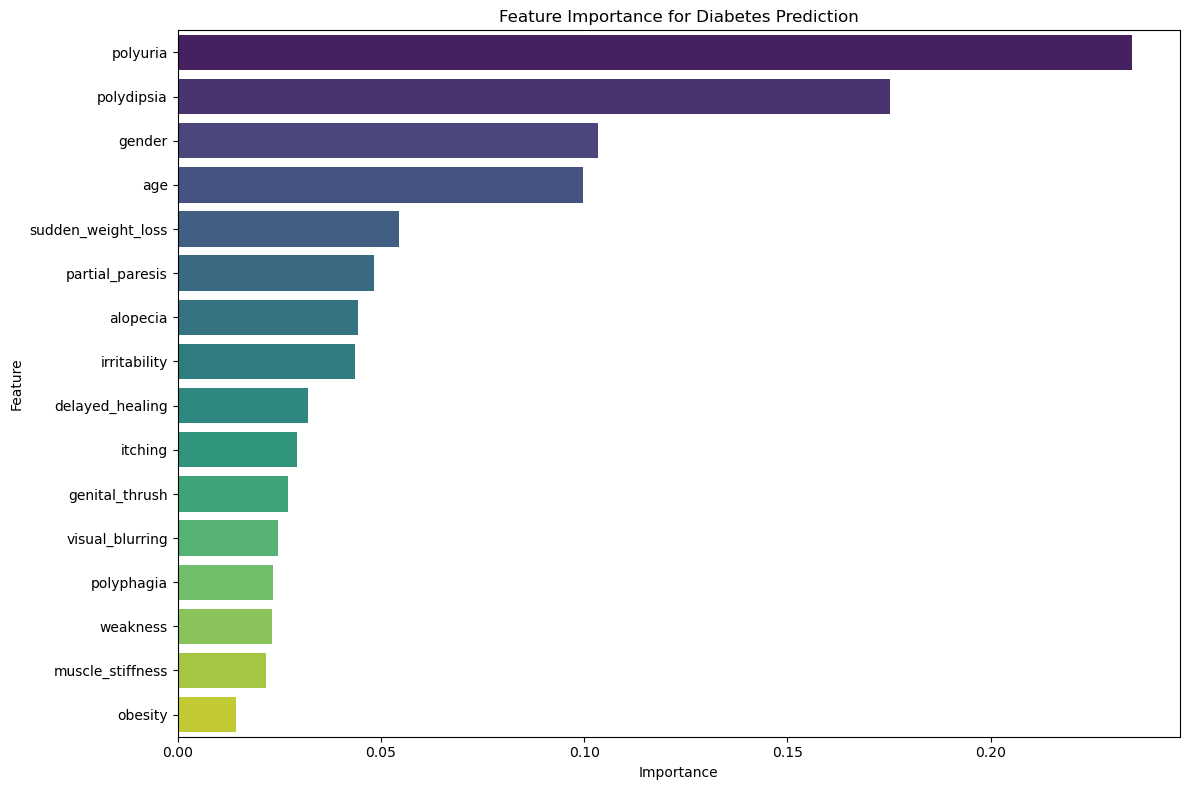

Top Features Contributing to Diabetes Prediction:
               Feature  Importance
2             polyuria    0.234835
3           polydipsia    0.175321
1               gender    0.103399
0                  age    0.099789
4   sudden_weight_loss    0.054346
12     partial_paresis    0.048371
14            alopecia    0.044270
10        irritability    0.043548
11     delayed_healing    0.032086
9              itching    0.029481


In [46]:
# Step 1: Import necessary libraries for feature importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 2: Preprocess the data
# Encode categorical columns
data_encoded = data.copy()
label_encoders = {}

# Encode all object-type columns
for col in data_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Step 3: Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['class'])  # Features
y = data_encoded['class']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Extract feature importances
importances = rf_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance for Diabetes Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')  # Save the chart
plt.show()

# Step 7: Display top features
print("Top Features Contributing to Diabetes Prediction:")
print(feature_importance_df.head(10))

## Model Development: Build, train, and evaluate machine learning models using supervised learning algorithms.


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

Accuracy: 0.9231, AUC: 0.9714

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

Accuracy: 0.9519, AUC: 0.9648

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                     

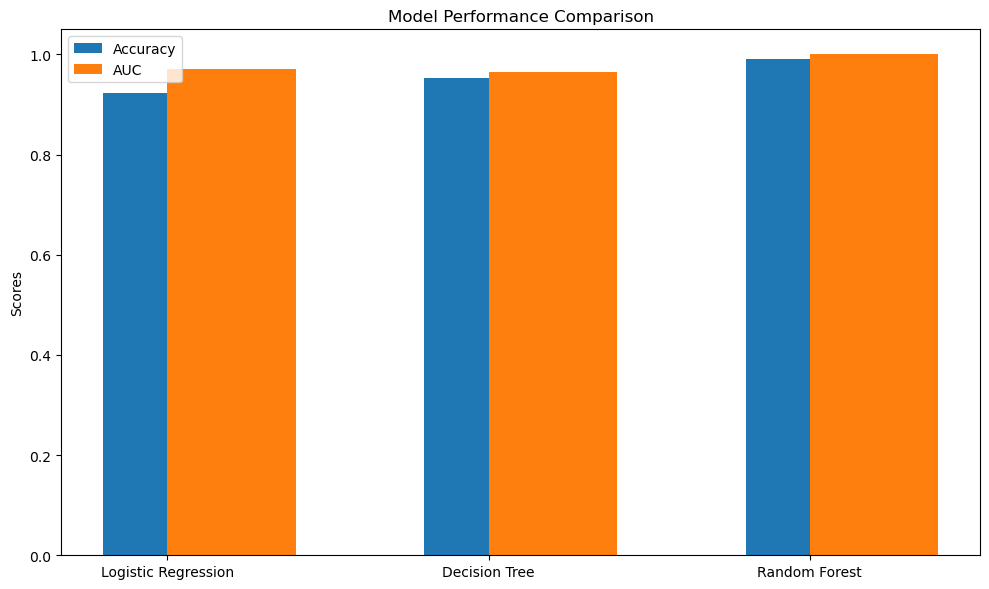

In [47]:
# Step 1: Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score

# Step 2: Preprocess the data
# Encode categorical columns
data_encoded = data.copy()
label_encoders = {}

# Encode all object-type columns
for col in data_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le

# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['class'])  # Features
y = data_encoded['class']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train and evaluate models

# Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_preds)
log_auc = roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])
print("Logistic Regression Performance:")
print(classification_report(y_test, log_preds))
print(f"Accuracy: {log_accuracy:.4f}, AUC: {log_auc:.4f}")

# Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_preds))
print(f"Accuracy: {dt_accuracy:.4f}, AUC: {dt_auc:.4f}")

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("\nRandom Forest Performance:")
print(classification_report(y_test, rf_preds))
print(f"Accuracy: {rf_accuracy:.4f}, AUC: {rf_auc:.4f}")

# Step 4: Compare Model Performance
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [log_accuracy, dt_accuracy, rf_accuracy]
aucs = [log_auc, dt_auc, rf_auc]

# Plotting performance metrics
plt.figure(figsize=(10, 6))
x = range(len(models))
plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar(x, aucs, width=0.4, label='AUC', align='edge')
plt.xticks(x, models)
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.legend()
plt.tight_layout()
plt.savefig('model_performance_comparison.png')  # Save the chart
plt.show()

## Model Evaluation: Assess model performance using accuracy, precision, recall, F1-score, and ROC-AUC metrics.


Logistic Regression:
Performance Metrics for Logistic Regression:
Accuracy: 0.9231
Precision: 0.9315
Recall: 0.9577
F1-Score: 0.9444
ROC-AUC: 0.9714

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Decision Tree:
Performance Metrics for Decision Tree:
Accuracy: 0.9519
Precision: 1.0000
Recall: 0.9296
F1-Score: 0.9635
ROC-AUC: 0.9648

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.93      0.96        71

    accuracy                           0.95       104
   macro avg       0.93      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104


Random Fo

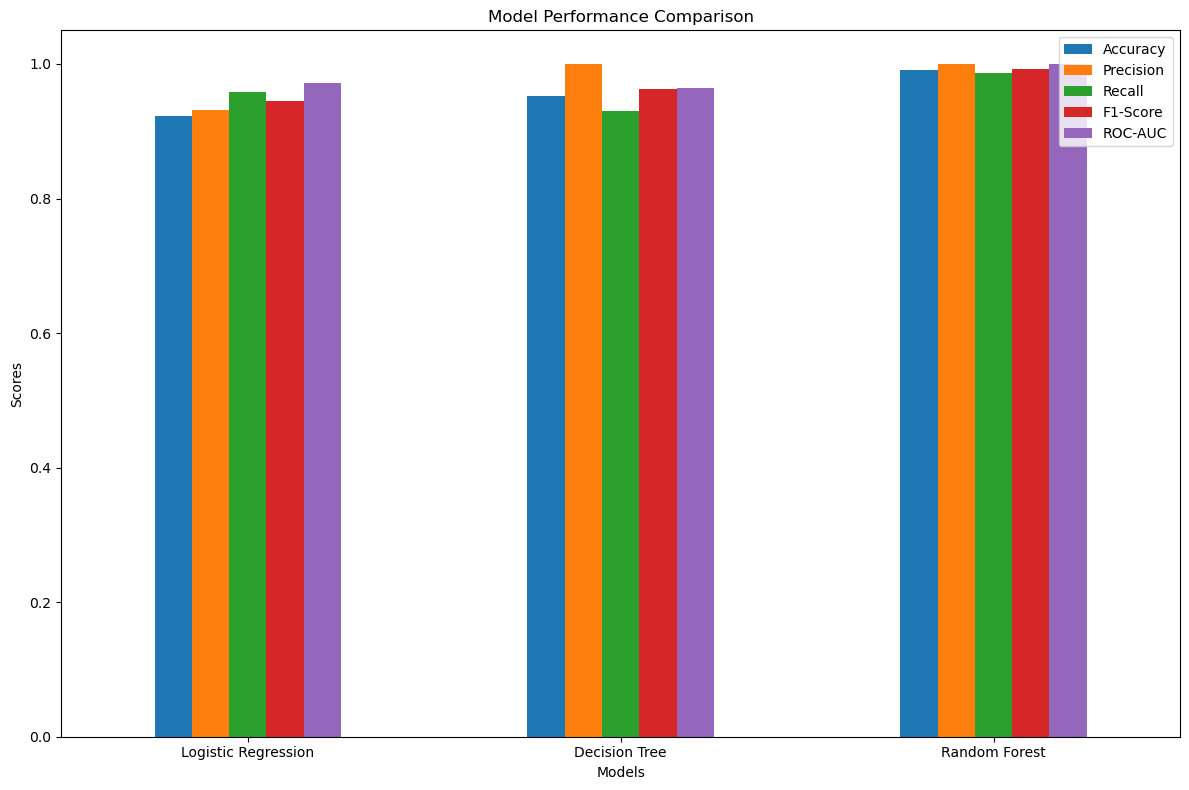

In [48]:
# Step 1: Define a function to evaluate model performance
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the model on the test set and prints key metrics.
    """
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, probs)
    
    print(f"Performance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, preds))
    
    return accuracy, precision, recall, f1, roc_auc

# Step 2: Evaluate each model
print("\nLogistic Regression:")
log_metrics = evaluate_model(log_model, X_test, y_test, "Logistic Regression")

print("\nDecision Tree:")
dt_metrics = evaluate_model(dt_model, X_test, y_test, "Decision Tree")

print("\nRandom Forest:")
rf_metrics = evaluate_model(rf_model, X_test, y_test, "Random Forest")

# Step 3: Compare all models in a DataFrame for easy interpretation
import pandas as pd
metrics_df = pd.DataFrame(
    [log_metrics, dt_metrics, rf_metrics],
    columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    index=['Logistic Regression', 'Decision Tree', 'Random Forest']
)

# Display and save the comparison
print("\nModel Comparison:")
print(metrics_df)
metrics_df.to_csv('model_comparison_metrics.csv')  # Save results as a CSV

# Step 4: Plot comparison of metrics
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('model_evaluation_comparison.png')  # Save the chart
plt.show()